<a href="https://colab.research.google.com/github/MayerT1/TensorFlow/blob/master/Final_ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
#create a symbolic link for pointing to /content/mnt/My Drive/Colab Notebooks
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path) 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [0]:
%cd /content/notebooks/
!ls

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import brier_score_loss
from google.colab import files


import pandas as pd
import numpy as np
#from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

In [0]:

#mydataset = pd.read_csv('Sample_Points_CSV_Mya2019_4_9.csv')
#mydataset = pd.read_csv('Sample_Points_CSV_Cam2019_4_9.csv')
#mydataset = pd.read_csv('Sample_Points_CSV_Cam2018_4_9.csv')
mydataset = pd.read_csv('Sample_Points_CSV_all_4_9.csv')

display(mydataset)

actual = mydataset['WaterPlane']
bmaxGeeGrd = mydataset['bmaxGeeGrd']
bmaxSnapRtc = mydataset['bmaxSnapRtc']
edgeGeeGrd = mydataset['edgeGeeGrd']
edgeSnapRtc = mydataset['edgeSnapRtc']


##Class names for binary analysis
class_names = ['Water', 'Not Water']

,system:index,Date_str,WaterPlane,bmaxGeeGrd,bmaxSnapRtc,edgeGeeGrd,edgeSnapRtc,latitude_209564535,lc,longitude_209564535,.geo
0,0_1_1_00000000000000000000_0,2018-01-04,0,0,0,0,0,NaN,7,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,0_1_1_00000000000000000001_0,2018-01-04,0,0,0,0,0,NaN,6,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,0_1_1_00000000000000000002_0,2018-01-04,0,0,0,0,0,NaN,7,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,0_1_1_00000000000000000003_0,2018-01-04,0,0,0,0,0,NaN,7,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,0_1_1_00000000000000000004_0,2018-01-04,0,0,0,0,0,NaN,5,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
...,...,...,...,...,...,...,...,...,...,...,...
3166,22_2_00000000000000000376_0,2019-08-05,1,1,1,1,1,NaN,14,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3167,22_2_00000000000000000379_0,2019-08-05,1,1,1,1,1,NaN,10,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3168,22_2_0000000000000000037e_0,2019-08-05,1,1,1,1,1,NaN,1,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3169,22_2_00000000000000000380_0,2019-08-05,1,1,1,1,1,NaN,10,NaN,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


# Data Flipping

In [0]:
##Flips the data through transpose and flip to rearrange the confusion matrix values:(tp, tn, fp, fn) so that it can be emplyed by the the ploting code block below

bmaxGeeGrd_results = confusion_matrix(actual, bmaxGeeGrd)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxGeeGrd = bmaxGeeGrd_results.transpose()
#print("transposed_bmaxGeeGrd", transposed_bmaxGeeGrd)

final_bmaxGeeGrd_results = np.flip(transposed_bmaxGeeGrd)
print("final_bmaxGeeGrd_results", final_bmaxGeeGrd_results)

print("######")

bmaxSnapRtc_results = confusion_matrix(actual, bmaxSnapRtc)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_bmaxSnapRtc = bmaxSnapRtc_results.transpose()
#print("transposed_bmaxSnapRtc", transposed_bmaxSnapRtc)

final_bmaxSnapRtc_results = np.flip(transposed_bmaxSnapRtc)
print("final_bmaxSnapRtc_results", final_bmaxSnapRtc_results)

print("######")

edgeGeeGrd_results = confusion_matrix(actual, edgeGeeGrd)
print("bmaxGeeGrd_results", bmaxGeeGrd_results)

transposed_edgeGeeGrd = edgeGeeGrd_results.transpose()
#print("transposed_edgeGeeGrd", transposed_edgeGeeGrd)

final_edgeGeeGrd_results = np.flip(transposed_edgeGeeGrd)
print("final_edgeGeeGrd_results", final_edgeGeeGrd_results)

print("######")

edgeSnapRtc_results = confusion_matrix(actual, edgeSnapRtc)
print("edgeSnapRtc_results", edgeSnapRtc_results)

transposed_edgeSnapRtc = edgeSnapRtc_results.transpose()
#print("transposed_edgeGeeGrd", transposed_edgeGeeGrd)

final_edgeSnapRtc_results = np.flip(transposed_edgeSnapRtc)
print("final_edgeSnapRtc_results", final_edgeSnapRtc_results)

bmaxGeeGrd_results [[2319  128]
 [  87  637]]
final_bmaxGeeGrd_results [[ 637  128]
 [  87 2319]]
######
bmaxGeeGrd_results [[2319  128]
 [  87  637]]
final_bmaxSnapRtc_results [[ 615  109]
 [ 109 2338]]
######
bmaxGeeGrd_results [[2319  128]
 [  87  637]]
final_edgeGeeGrd_results [[ 472   28]
 [ 252 2419]]
######
edgeSnapRtc_results [[2427   20]
 [ 148  576]]
final_edgeSnapRtc_results [[ 576   20]
 [ 148 2427]]


# Export Stats

In [0]:
#displays a table of indexed by stat method/algorithm
stat_dict = {"Stat_method":  ["Accuracy Score", "precision_score", "average_precision_score", "cohen_kappa_score", "brier_score_loss", "roc_auc_score", 'f1_score' ],
                        'bmaxGeeGrd':   [accuracy_score(actual, bmaxGeeGrd), precision_score(actual, bmaxGeeGrd),average_precision_score(actual, bmaxGeeGrd), cohen_kappa_score(actual, bmaxGeeGrd), brier_score_loss(actual, bmaxGeeGrd), roc_auc_score(actual, bmaxGeeGrd), f1_score(actual, bmaxGeeGrd)],
                        'bmaxSnapRtc':  [accuracy_score(actual, bmaxSnapRtc),precision_score(actual, bmaxSnapRtc), average_precision_score(actual, bmaxSnapRtc), cohen_kappa_score(actual, bmaxSnapRtc), brier_score_loss(actual, bmaxSnapRtc), roc_auc_score(actual, bmaxSnapRtc),f1_score(actual, bmaxGeeGrd)],
                        'edgeGeeGrd':   [accuracy_score(actual, edgeGeeGrd), precision_score(actual, edgeGeeGrd), average_precision_score(actual, edgeGeeGrd),cohen_kappa_score(actual, edgeGeeGrd), brier_score_loss(actual, edgeGeeGrd), roc_auc_score(actual, edgeGeeGrd), f1_score(actual, edgeGeeGrd)],
                        "edgeSnapRtc":  [accuracy_score(actual, edgeSnapRtc), precision_score(actual, edgeSnapRtc), average_precision_score(actual, edgeSnapRtc), cohen_kappa_score(actual, edgeSnapRtc), brier_score_loss(actual, edgeSnapRtc), roc_auc_score(actual, edgeSnapRtc), f1_score(actual, edgeSnapRtc)],
                        }

stat_dict_output_df = pd.DataFrame(stat_dict)
display(stat_dict_output_df)

# In colab go to the table of contents (left panel)-> select Files (furtherst left)-> find this CSV right click and download
stat_dict_output_df.to_csv('stat_dict_output_df.csv')



print("-")
print( 'classification_report bmaxGeeGrd :')
print( classification_report(actual, bmaxGeeGrd) )
print("-")
print( 'classification_report bmaxSnapRtc :')
print( classification_report(actual, bmaxSnapRtc) )
print("-")
print( 'classification_report edgeGeeGrd :')
print( classification_report(actual, edgeGeeGrd) )
print("-")
print( 'classification_report edgeSnapRtc :')
print( classification_report(actual, edgeSnapRtc) )


,Stat_method,bmaxGeeGrd,bmaxSnapRtc,edgeGeeGrd,edgeSnapRtc
0,Accuracy Score,0.932198,0.931252,0.911700,0.947020
1,precision_score,0.832680,0.849448,0.944000,0.966443
2,average_precision_score,0.760056,0.755935,0.694896,0.815556
3,cohen_kappa_score,0.811349,0.804903,0.718785,0.839671
4,brier_score_loss,0.067802,0.068748,0.088300,0.052980
5,roc_auc_score,0.913763,0.902452,0.820246,0.893703
6,f1_score,0.855608,0.855608,0.771242,0.872727


-
classification_report bmaxGeeGrd :
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2447
           1       0.83      0.88      0.86       724

    accuracy                           0.93      3171
   macro avg       0.90      0.91      0.91      3171
weighted avg       0.93      0.93      0.93      3171

-
classification_report bmaxSnapRtc :
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2447
           1       0.85      0.85      0.85       724

    accuracy                           0.93      3171
   macro avg       0.90      0.90      0.90      3171
weighted avg       0.93      0.93      0.93      3171

-
classification_report edgeGeeGrd :
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2447
           1       0.94      0.65      0.77       724

    accuracy                           0.91      3171
   macro avg    

# Confusion Matrix Referencing Flipped data

Confusion matrix, without normalization
[[ 637  128]
 [  87 2319]]


NameError: ignored

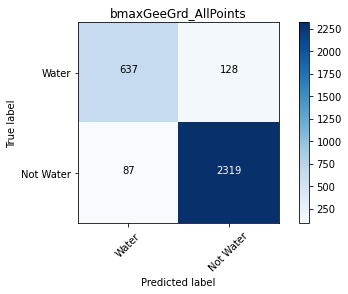

In [0]:
#this code block produces 4 confusion matrices using plot_confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


##code should automatically save the plots as pngs or you can right click them and save as too.

#Plot bmaxGeeGrd confusion matrix
plt.figure()
plot_confusion_matrix(final_bmaxGeeGrd_results, classes=class_names,
                      title= 'bmaxGeeGrd_AllPoints')

fig.savefig('bmaxGeeGrd_Enter_title_here')

# Plot bmaxSnapRtc confusion matrix
plt.figure()
plot_confusion_matrix(final_bmaxSnapRtc_results, classes=class_names,
                      title='bmaxSnapRtc_AllPoints')
fig.savefig('bmaxSnapRtc_Enter_title_here')

# Plot edgeGeeGrd confusion matrix
plt.figure()
plot_confusion_matrix(final_edgeGeeGrd_results, classes=class_names,
                      title='edgeGeeGrd_AllPoints')
fig.savefig('edgeGeeGrd_Enter_title_here')

# Plot edgeSnapRtc confusion matrix
plt.figure()
plot_confusion_matrix(final_edgeSnapRtc_results, classes=class_names,
                      title='edgeSnapRtc_AllPoints')
fig.savefig('edgeSnapRtc_Enter_title_here')

plt.savefig("abc.png")
plt.show()

# ROC AUC Plots

roc_auc_score bmaxGeeGrd : 0.9137626522046389
roc_auc_score bmaxSnapRtc : 0.9024515869019906
roc_auc_score edgeGeeGrd : 0.8202455594515327
roc_auc_scoreedgeSnapRtc : 0.8937034185506213
-
bmaxGeeGrd roc_curve metrics "fpr", "tpr", "thresholds", : (array([0.        , 0.05230895, 1.        ]), array([0.        , 0.87983425, 1.        ]), array([2, 1, 0]))
bmaxSnapRtc roc_curve metrics "fpr", "tpr", "thresholds", : (array([0.        , 0.04454434, 1.        ]), array([0.        , 0.84944751, 1.        ]), array([2, 1, 0]))
edgeGeeGrd roc_curve metrics "fpr", "tpr", "thresholds", : (array([0.        , 0.01144258, 1.        ]), array([0.       , 0.6519337, 1.       ]), array([2, 1, 0]))
edgeSnapRtc roc_curve metrics "fpr", "tpr", "thresholds", : (array([0.        , 0.00817327, 1.        ]), array([0.        , 0.79558011, 1.        ]), array([2, 1, 0]))


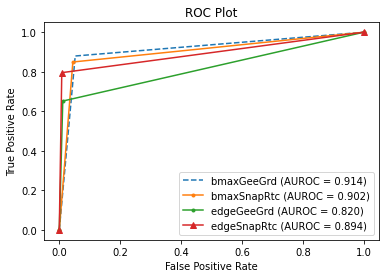

In [0]:
#code block fro producing a single ROC plot for all for algorthims

bmaxGeeGrd_auc = roc_auc_score(actual, bmaxGeeGrd)
bmaxSnapRtc_auc = roc_auc_score(actual, bmaxSnapRtc)
edgeGeeGrd_auc = roc_auc_score(actual, edgeGeeGrd)
edgeSnapRtc_auc = roc_auc_score(actual, edgeSnapRtc)

print('roc_auc_score bmaxGeeGrd :', bmaxGeeGrd_auc)
print('roc_auc_score bmaxSnapRtc :',bmaxSnapRtc_auc)
print('roc_auc_score edgeGeeGrd :',edgeGeeGrd_auc)
print('roc_auc_scoreedgeSnapRtc :',edgeSnapRtc_auc)

print('-')

bmaxGeeGrd_fpr, bmaxGeeGrd_tpr, _ = roc_curve(actual, bmaxGeeGrd)
bmaxSnapRtc_fpr, bmaxSnapRtc_tpr, _ = roc_curve(actual, bmaxSnapRtc)
edgeGeeGrd_fpr, edgeGeeGrd_tpr, _ = roc_curve(actual, edgeGeeGrd)
edgeSnapRtc_fpr, edgeSnapRtc_tpr, _ = roc_curve(actual, edgeSnapRtc)

print('bmaxGeeGrd roc_curve metrics "fpr", "tpr", "thresholds", :', metrics.roc_curve(actual, bmaxGeeGrd))
print('bmaxSnapRtc roc_curve metrics "fpr", "tpr", "thresholds", :', metrics.roc_curve(actual, bmaxSnapRtc))
print('edgeGeeGrd roc_curve metrics "fpr", "tpr", "thresholds", :', metrics.roc_curve(actual, edgeGeeGrd))
print('edgeSnapRtc roc_curve metrics "fpr", "tpr", "thresholds", :', metrics.roc_curve(actual, edgeSnapRtc))

plt.plot(bmaxGeeGrd_fpr, bmaxGeeGrd_tpr, linestyle='--', label='bmaxGeeGrd (AUROC = %0.3f)' % bmaxGeeGrd_auc)
plt.plot(bmaxSnapRtc_fpr, bmaxSnapRtc_tpr, marker='.', label='bmaxSnapRtc (AUROC = %0.3f)' % bmaxSnapRtc_auc)
plt.plot(edgeGeeGrd_fpr, edgeGeeGrd_tpr, marker='.', label='edgeGeeGrd (AUROC = %0.3f)' % edgeGeeGrd_auc)
plt.plot(edgeSnapRtc_fpr, edgeSnapRtc_tpr, marker='^', label='edgeSnapRtc (AUROC = %0.3f)' % edgeSnapRtc_auc)
# plt.plot(edgeGeeGrd_auc_fpr, edgeGeeGrd_auc_tpr, marker='.', label='edgeGeeGrd (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
#fig.savefig('AUC.png')
# Show plot
plt.show()


# Addiotnal stats print outs

In [0]:

print("-")
print( 'Accuracy Score bmaxGeeGrd :',accuracy_score(actual, bmaxGeeGrd) )
print( 'Accuracy Score bmaxSnapRtc :',accuracy_score(actual, bmaxSnapRtc) )
print( 'Accuracy Score edgeGeeGrd :',accuracy_score(actual, edgeGeeGrd) )
print( 'Accuracy Score edgeSnapRtc :',accuracy_score(actual, edgeSnapRtc))


print("-")
print('precision_score bmaxGeeGrd :', precision_score(actual, bmaxGeeGrd))
print('precision_score bmaxSnapRtc :', precision_score(actual, bmaxSnapRtc))
print('precision_score edgeGeeGrd :', precision_score(actual, edgeGeeGrd))
print('precision_score edgeSnapRtc :', precision_score(actual, edgeSnapRtc))

print("-")
print('cohen_kappa_score bmaxGeeGrd :',cohen_kappa_score(actual, bmaxGeeGrd))
print('cohen_kappa_score bmaxSnapRtc :',cohen_kappa_score(actual, bmaxSnapRtc))
print('cohen_kappa_score edgeGeeGrd :',cohen_kappa_score(actual, edgeGeeGrd))
print('cohen_kappa_score edgeSnapRtc :',cohen_kappa_score(actual, edgeSnapRtc))

print("-")
print('average_precision_score bmaxGeeGrd :',average_precision_score(actual, bmaxGeeGrd))
print('average_precision_score bmaxSnapRtc :',average_precision_score(actual, bmaxSnapRtc))
print('average_precision_score edgeGeeGrd :',average_precision_score(actual, edgeGeeGrd))
print('average_precision_score edgeSnapRtc :',average_precision_score(actual, edgeSnapRtc))

print("-")
print('f1_score bmaxGeeGrd :',f1_score(actual, bmaxGeeGrd))
print('f1_score bmaxSnapRtc :',f1_score(actual, bmaxSnapRtc))
print('f1_score edgeGeeGrd :',f1_score(actual, edgeGeeGrd))
print('f1_score edgeSnapRtc :',f1_score(actual, edgeSnapRtc))


print("-")
print('fbeta_score beta=.05 bmaxGeeGrd :',fbeta_score(actual, bmaxGeeGrd, beta=0.5))
print('fbeta_score beta=.05 bmaxSnapRtc :',fbeta_score(actual, bmaxSnapRtc, beta=0.5))
print('fbeta_score beta=.05 edgeGeeGrd :',fbeta_score(actual, edgeGeeGrd, beta=0.5))
print('fbeta_score beta=.05 edgeSnapRtc :',fbeta_score(actual, edgeSnapRtc, beta=0.5))
print("-")
print('fbeta_score beta=1 bmaxGeeGrd :',fbeta_score(actual, bmaxGeeGrd, beta=1))
print('fbeta_score beta=1 bmaxSnapRtc :',fbeta_score(actual, bmaxSnapRtc, beta=1))
print('fbeta_score beta=1 edgeGeeGrd :',fbeta_score(actual, edgeGeeGrd, beta=1))
print('fbeta_score beta=1 edgeSnapRtc :',fbeta_score(actual, edgeSnapRtc, beta=1))
print("-")
print('fbeta_score beta=2 bmaxGeeGrd :',fbeta_score(actual, bmaxGeeGrd, beta=2))
print('fbeta_score beta=2 bmaxSnapRtc :',fbeta_score(actual, bmaxSnapRtc, beta=2))
print('fbeta_score beta=2 edgeGeeGrd :',fbeta_score(actual, edgeGeeGrd, beta=2))
print('fbeta_score beta=2 edgeSnapRtc :',fbeta_score(actual, edgeSnapRtc, beta=2))

print("-")
print('roc_auc_score bmaxGeeGrd :',roc_auc_score(actual, bmaxGeeGrd))
print('roc_auc_score bmaxSnapRtc :',roc_auc_score(actual, bmaxSnapRtc))
print('roc_auc_score edgeGeeGrd :',roc_auc_score(actual, edgeGeeGrd))
print('roc_auc_scoreedgeSnapRtc :',roc_auc_score(actual, edgeSnapRtc))


print("-")
print('brier_score_loss bmaxGeeGrd :',brier_score_loss(actual, bmaxGeeGrd))
print('brier_score_loss bmaxSnapRtc :',brier_score_loss(actual, bmaxSnapRtc))
print('brier_score_loss edgeGeeGrd :',brier_score_loss(actual, edgeGeeGrd))
print('brier_score_loss edgeSnapRtc:',brier_score_loss(actual, edgeSnapRtc))

print("-")
print( 'classification_report bmaxGeeGrd :')
print( classification_report(actual, bmaxGeeGrd) )
print("-")
print( 'classification_report bmaxSnapRtc :')
print( classification_report(actual, bmaxSnapRtc) )
print("-")
print( 'classification_report edgeGeeGrd :')
print( classification_report(actual, edgeGeeGrd) )
print("-")
print( 'classification_report edgeSnapRtc :')
print( classification_report(actual, edgeSnapRtc) )


-
Accuracy Score bmaxGeeGrd : 0.9321980447808262
Accuracy Score bmaxSnapRtc : 0.9312519709870704
Accuracy Score edgeGeeGrd : 0.9116997792494481
Accuracy Score edgeSnapRtc : 0.9470198675496688
-
precision_score bmaxGeeGrd : 0.8326797385620915
precision_score bmaxSnapRtc : 0.8494475138121547
precision_score edgeGeeGrd : 0.944
precision_score edgeSnapRtc : 0.9664429530201343
-
cohen_kappa_score bmaxGeeGrd : 0.8113491826971369
cohen_kappa_score bmaxSnapRtc : 0.8049031738039814
cohen_kappa_score edgeGeeGrd : 0.7187853941210602
cohen_kappa_score edgeSnapRtc : 0.8396707268038879
-
average_precision_score bmaxGeeGrd : 0.7600562967372257
average_precision_score bmaxSnapRtc : 0.7559350932281155
average_precision_score edgeGeeGrd : 0.6948956130401375
average_precision_score edgeSnapRtc : 0.8155557651783266
-
f1_score bmaxGeeGrd : 0.8556077904633982
f1_score bmaxSnapRtc : 0.8494475138121547
f1_score edgeGeeGrd : 0.7712418300653595
f1_score edgeSnapRtc : 0.8727272727272727
-
fbeta_score beta=.05 bm